In [6]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb

import pickle

%matplotlib inline

In [7]:
# Dataset import
datafile = pd.read_excel("E:/PROJECTS/Machine Learning/3. Flight price prediction/Dataset/Data_Train.xlsx")

In [8]:
df = datafile.copy()

### Exploratory Data Analysis

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df.shape

(10683, 11)

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Feature Engineering

In [15]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [16]:
# Breaking up of the Date_of_Journey column into 2 separte columns
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month
df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [17]:
# Dep_time break-up
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(["Dep_Time"],axis=1,inplace=True)

In [18]:
# Arrival_time break-up
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(["Arrival_Time"],axis=1,inplace=True)

In [19]:
# Duration time
duration=df['Duration'].str.split(' ',expand=True)
duration[1].fillna('00m',inplace=True)
df['duration_hr']=duration[0].apply(lambda x: x[:-1])
df['duration_min']=duration[1].apply(lambda x: x[:-1])
df.drop(["Duration"],axis=1,inplace=True)

In [20]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


### Visualisation

In [21]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [22]:
# Count of airline
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

F:\SOFTWARES\Installed files\PYTHON\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



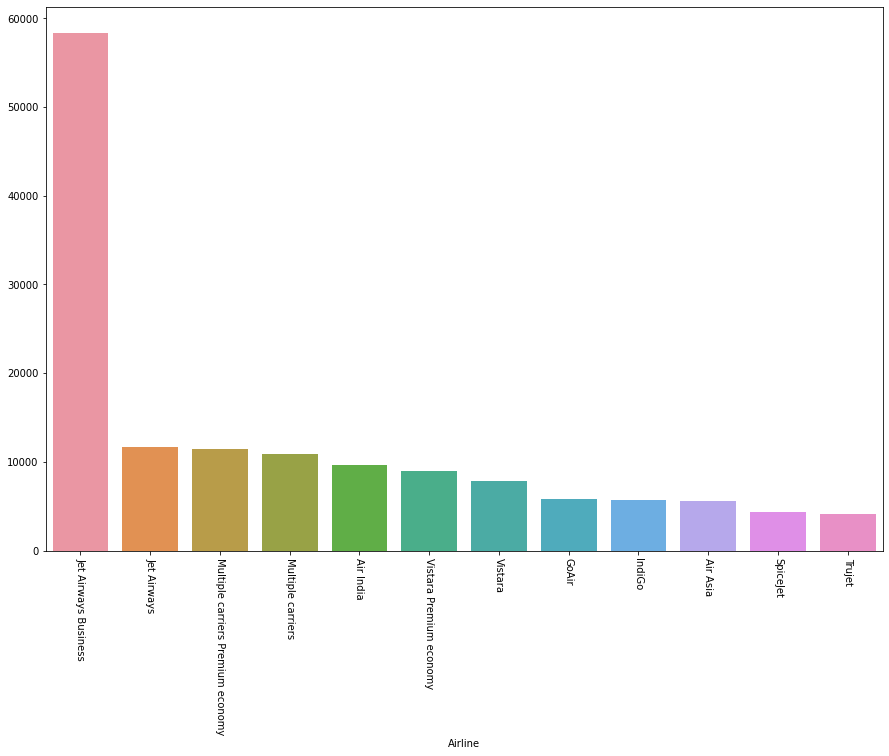

Jet airways has the highets and trujet has the lowest


In [23]:
# Airline vs. Price
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)
plt.show()
print("Jet airways has the highets and trujet has the lowest")

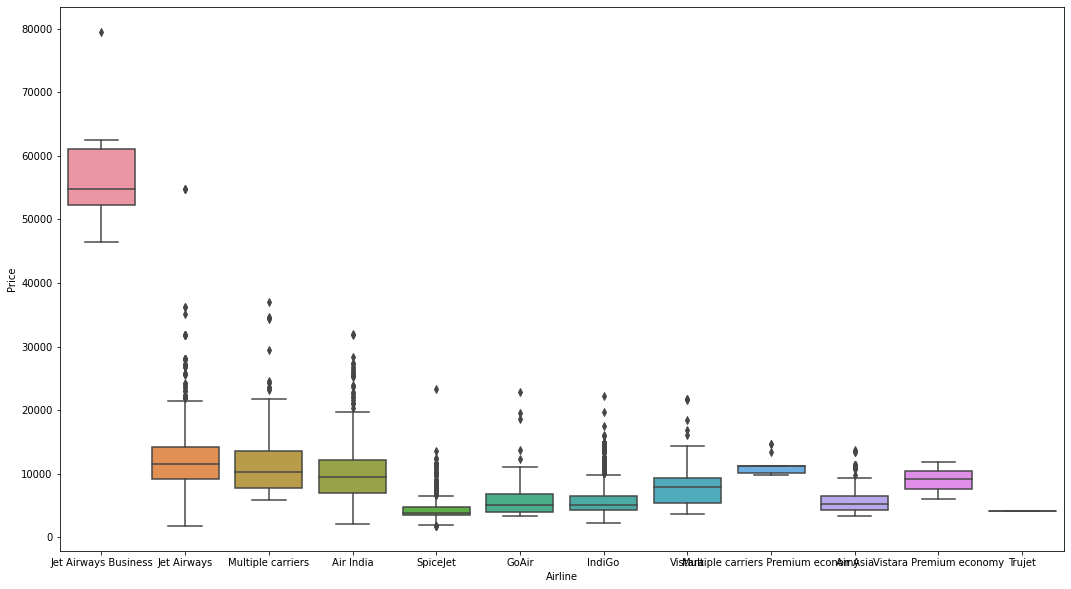

In [24]:
# Boxplot
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show()

In [25]:
# Price based on number of stops
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

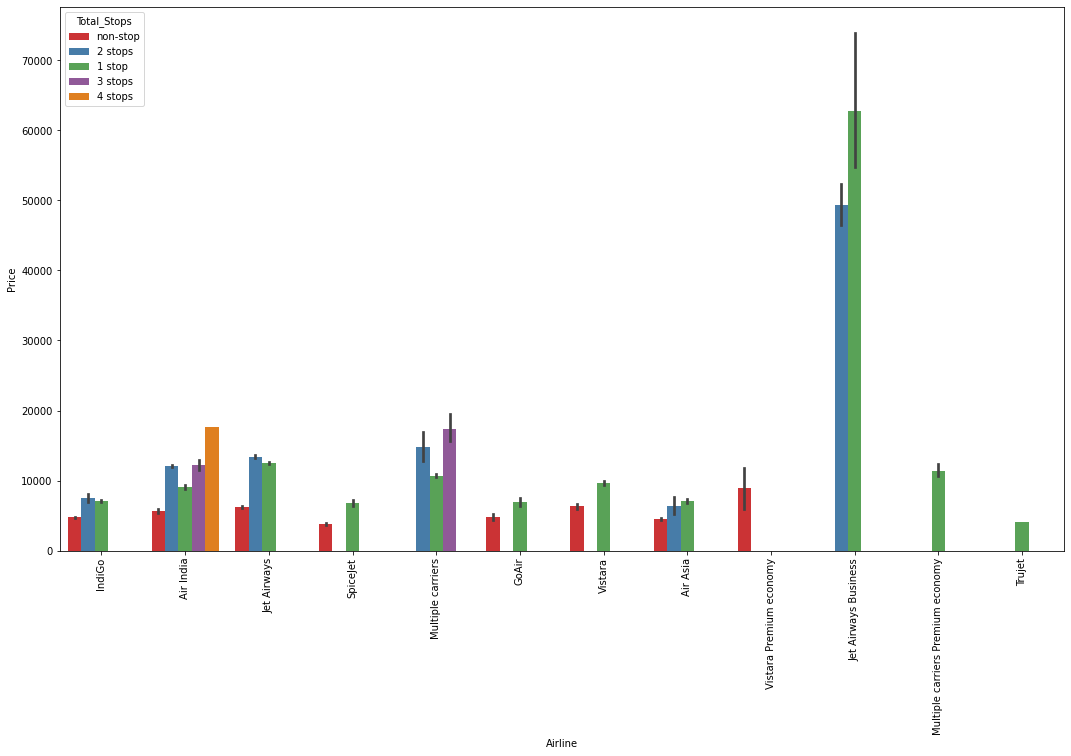

One stop and two stpos Jet Airways Business is having the highest price


In [26]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
print("One stop and two stpos Jet Airways Business is having the highest price")

In [27]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

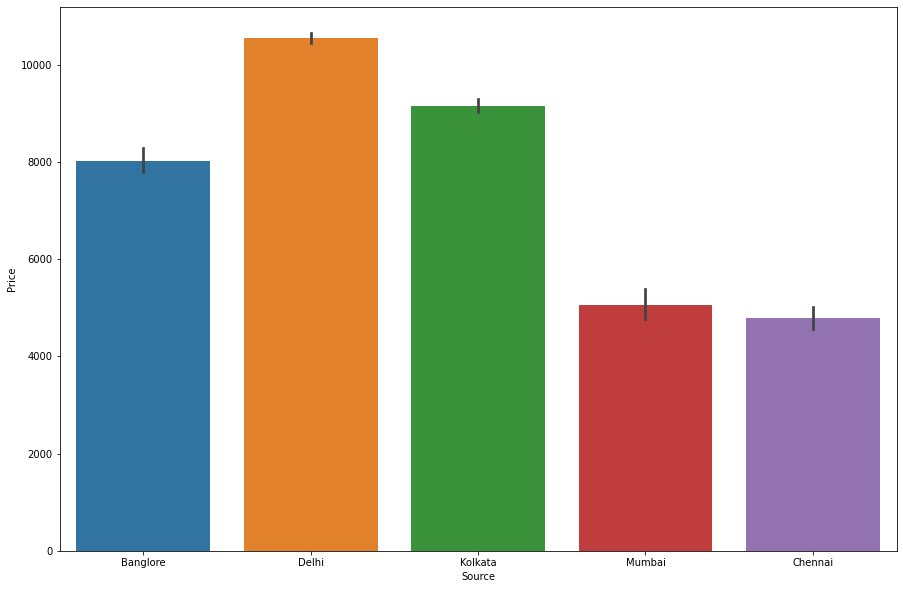

Flights taking off from Delhi has the highest price followed by Kolkata


In [28]:
# Source vs. Price
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()
print("Flights taking off from Delhi has the highest price followed by Kolkata")

In [29]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
# Delhi and New delhi values can be combined with just Delhi values.
for i in df:
    df.replace('New Delhi', 'Delhi', inplace=True)

In [31]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

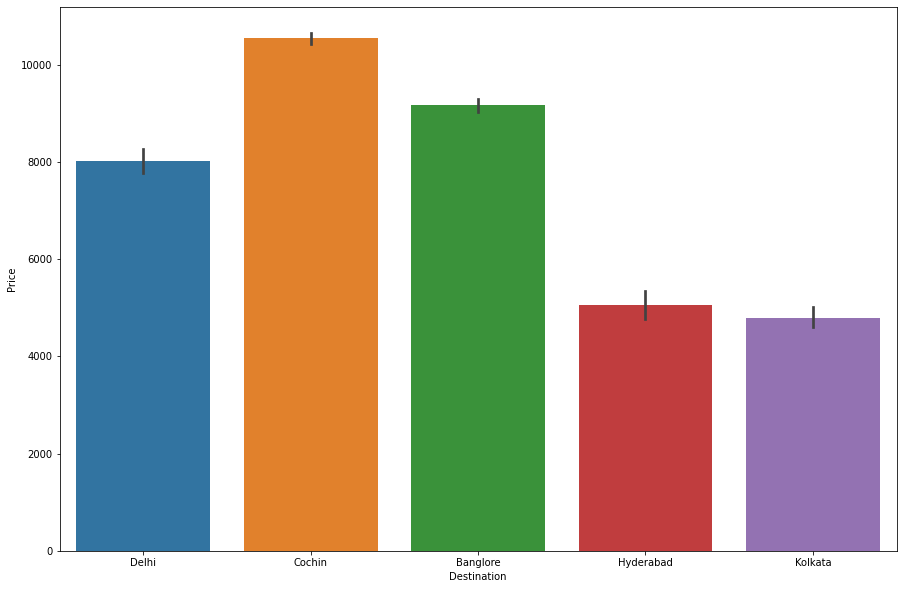

Flights landing to Cochin has the highest price and Kolkata has the lowest


In [32]:
# Destination vs price
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()
print("Flights landing to Cochin has the highest price and Kolkata has the lowest")

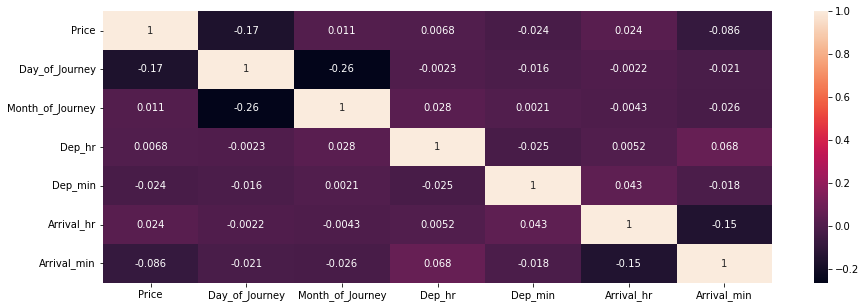

The variables are not much correlated with each other


In [33]:
# To check correlation between the variables
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()
print("The variables are not much correlated with each other")

In [34]:
df.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,No info,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [35]:
# Label Encoding
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [36]:
# Label encoding using Label Encoder
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [37]:
# Dropping of the unnecesary column
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [38]:
# Separation of the Dependent and Independent variable
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [39]:
x.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25


In [40]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

### Model building and hyperparameter tuning

In [41]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

### LINEAR REGRESSION

In [42]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(f"The model performance on train dataset: {round(model_lr.score(x_train, y_train),2)}")
print(f"The model performance on test dataset: {round(model_lr.score(x_test, y_test),2)}")

The model performance on train dataset: 0.6
The model performance on test dataset: 0.59


The linear regression model performs poorly both on the train and test dataset, thus we will not use it and will try tree models.

### DECISION TREE

In [44]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [45]:
print(f"The model performance on train dataset: {round(model_dt.score(x_train, y_train),2)}")
print(f"The model performance on test dataset: {round(model_dt.score(x_test, y_test),2)}")

The model performance on train dataset: 0.97
The model performance on test dataset: 0.71


The decision tree model as 97% score on the train dataset but achieves a score of only 72% on the test dataset, thus the model has overfitted. We can do hyperparameter tuning to reduce the overfitting, but for now let's try other models for better score.

### RANDOM FOREST REGRESSOR

In [46]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
print(f"The model performance on train dataset: {round(model_rf.score(x_train, y_train),2)}")
print(f"The model performance on test dataset: {round(model_rf.score(x_test, y_test),2)}")

The model performance on train dataset: 0.95
The model performance on test dataset: 0.81


### EXTRA TREE REGRESSOR

In [48]:
model_et = ExtraTreesRegressor()
model_et.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [49]:
print(f"The model performance on train dataset: {round(model_et.score(x_train, y_train),2)}")
print(f"The model performance on test dataset: {round(model_et.score(x_test, y_test),2)}")

The model performance on train dataset: 0.97
The model performance on test dataset: 0.78


### CATBOOST REGRESSOR

In [50]:
model_cat=CatBoostRegressor()
model_cat.fit(x_train,y_train)

Learning rate set to 0.05688
0:	learn: 4458.2753538	total: 141ms	remaining: 2m 20s
1:	learn: 4310.6689543	total: 145ms	remaining: 1m 12s
2:	learn: 4177.3541948	total: 149ms	remaining: 49.5s
3:	learn: 4047.5677970	total: 155ms	remaining: 38.6s
4:	learn: 3924.4272927	total: 160ms	remaining: 31.9s
5:	learn: 3813.8131138	total: 167ms	remaining: 27.7s
6:	learn: 3709.3140912	total: 173ms	remaining: 24.5s
7:	learn: 3613.5645103	total: 178ms	remaining: 22.1s
8:	learn: 3527.7072628	total: 183ms	remaining: 20.1s
9:	learn: 3462.1388263	total: 186ms	remaining: 18.4s
10:	learn: 3380.3271831	total: 189ms	remaining: 17s
11:	learn: 3310.9690763	total: 192ms	remaining: 15.8s
12:	learn: 3241.3035367	total: 195ms	remaining: 14.8s
13:	learn: 3177.7633322	total: 199ms	remaining: 14s
14:	learn: 3119.9689243	total: 202ms	remaining: 13.2s
15:	learn: 3067.9755495	total: 205ms	remaining: 12.6s
16:	learn: 3017.5768632	total: 208ms	remaining: 12s
17:	learn: 2973.4976375	total: 211ms	remaining: 11.5s
18:	learn: 29

158:	learn: 1990.3874106	total: 811ms	remaining: 4.29s
159:	learn: 1986.5025514	total: 814ms	remaining: 4.27s
160:	learn: 1983.8879627	total: 817ms	remaining: 4.26s
161:	learn: 1982.4481409	total: 820ms	remaining: 4.24s
162:	learn: 1981.1057485	total: 823ms	remaining: 4.22s
163:	learn: 1977.7619912	total: 826ms	remaining: 4.21s
164:	learn: 1976.2798897	total: 828ms	remaining: 4.19s
165:	learn: 1974.2231070	total: 831ms	remaining: 4.18s
166:	learn: 1971.7310486	total: 834ms	remaining: 4.16s
167:	learn: 1971.0945644	total: 837ms	remaining: 4.14s
168:	learn: 1968.9532560	total: 840ms	remaining: 4.13s
169:	learn: 1966.7911659	total: 843ms	remaining: 4.11s
170:	learn: 1965.7081749	total: 846ms	remaining: 4.1s
171:	learn: 1963.7528256	total: 849ms	remaining: 4.09s
172:	learn: 1961.2270959	total: 852ms	remaining: 4.07s
173:	learn: 1959.0023730	total: 855ms	remaining: 4.06s
174:	learn: 1957.1641714	total: 858ms	remaining: 4.04s
175:	learn: 1956.3256158	total: 861ms	remaining: 4.03s
176:	learn:

311:	learn: 1752.5643273	total: 1.4s	remaining: 3.09s
312:	learn: 1751.9294876	total: 1.41s	remaining: 3.08s
313:	learn: 1750.4766073	total: 1.41s	remaining: 3.08s
314:	learn: 1749.3959895	total: 1.41s	remaining: 3.07s
315:	learn: 1748.6001298	total: 1.42s	remaining: 3.06s
316:	learn: 1747.2936283	total: 1.42s	remaining: 3.06s
317:	learn: 1746.5642108	total: 1.42s	remaining: 3.05s
318:	learn: 1745.8459188	total: 1.43s	remaining: 3.05s
319:	learn: 1744.4676297	total: 1.43s	remaining: 3.04s
320:	learn: 1743.4857006	total: 1.43s	remaining: 3.03s
321:	learn: 1741.9782636	total: 1.44s	remaining: 3.03s
322:	learn: 1740.9080046	total: 1.44s	remaining: 3.02s
323:	learn: 1740.1024000	total: 1.45s	remaining: 3.02s
324:	learn: 1739.2601807	total: 1.45s	remaining: 3.01s
325:	learn: 1737.7422208	total: 1.46s	remaining: 3.01s
326:	learn: 1737.0726234	total: 1.46s	remaining: 3s
327:	learn: 1735.8867194	total: 1.46s	remaining: 3s
328:	learn: 1735.0547172	total: 1.47s	remaining: 2.99s
329:	learn: 1734.

494:	learn: 1600.5055202	total: 2.06s	remaining: 2.1s
495:	learn: 1599.0997170	total: 2.06s	remaining: 2.09s
496:	learn: 1598.1239443	total: 2.06s	remaining: 2.09s
497:	learn: 1597.1816720	total: 2.06s	remaining: 2.08s
498:	learn: 1596.8414010	total: 2.07s	remaining: 2.08s
499:	learn: 1596.0132998	total: 2.07s	remaining: 2.07s
500:	learn: 1595.6886422	total: 2.07s	remaining: 2.07s
501:	learn: 1594.9742991	total: 2.08s	remaining: 2.06s
502:	learn: 1594.1178137	total: 2.08s	remaining: 2.06s
503:	learn: 1593.4375558	total: 2.09s	remaining: 2.05s
504:	learn: 1592.7452770	total: 2.09s	remaining: 2.05s
505:	learn: 1592.3433616	total: 2.09s	remaining: 2.04s
506:	learn: 1591.4357231	total: 2.1s	remaining: 2.04s
507:	learn: 1590.9979296	total: 2.1s	remaining: 2.04s
508:	learn: 1590.6895370	total: 2.11s	remaining: 2.03s
509:	learn: 1590.0642261	total: 2.11s	remaining: 2.03s
510:	learn: 1589.3895474	total: 2.11s	remaining: 2.02s
511:	learn: 1588.2866663	total: 2.12s	remaining: 2.02s
512:	learn: 1

647:	learn: 1509.3502163	total: 2.55s	remaining: 1.38s
648:	learn: 1508.8548872	total: 2.55s	remaining: 1.38s
649:	learn: 1508.4888717	total: 2.55s	remaining: 1.38s
650:	learn: 1508.2477037	total: 2.56s	remaining: 1.37s
651:	learn: 1508.0149226	total: 2.56s	remaining: 1.37s
652:	learn: 1507.6088812	total: 2.56s	remaining: 1.36s
653:	learn: 1507.3886849	total: 2.56s	remaining: 1.36s
654:	learn: 1506.6692968	total: 2.57s	remaining: 1.35s
655:	learn: 1506.4309651	total: 2.57s	remaining: 1.35s
656:	learn: 1505.7847099	total: 2.57s	remaining: 1.34s
657:	learn: 1505.3640739	total: 2.58s	remaining: 1.34s
658:	learn: 1504.9353428	total: 2.58s	remaining: 1.33s
659:	learn: 1504.7549192	total: 2.58s	remaining: 1.33s
660:	learn: 1504.1557970	total: 2.58s	remaining: 1.33s
661:	learn: 1503.2742027	total: 2.59s	remaining: 1.32s
662:	learn: 1502.8666172	total: 2.59s	remaining: 1.32s
663:	learn: 1502.3035642	total: 2.59s	remaining: 1.31s
664:	learn: 1501.4032039	total: 2.6s	remaining: 1.31s
665:	learn:

803:	learn: 1436.7542869	total: 3.04s	remaining: 740ms
804:	learn: 1436.4237289	total: 3.04s	remaining: 736ms
805:	learn: 1436.3193391	total: 3.04s	remaining: 732ms
806:	learn: 1435.6428059	total: 3.04s	remaining: 728ms
807:	learn: 1435.2167568	total: 3.05s	remaining: 725ms
808:	learn: 1434.7386192	total: 3.05s	remaining: 721ms
809:	learn: 1434.5037266	total: 3.06s	remaining: 717ms
810:	learn: 1434.3403099	total: 3.06s	remaining: 713ms
811:	learn: 1434.1729623	total: 3.06s	remaining: 709ms
812:	learn: 1433.8596838	total: 3.06s	remaining: 705ms
813:	learn: 1433.4356362	total: 3.07s	remaining: 701ms
814:	learn: 1432.9093244	total: 3.07s	remaining: 697ms
815:	learn: 1432.5728622	total: 3.07s	remaining: 693ms
816:	learn: 1431.9669187	total: 3.08s	remaining: 689ms
817:	learn: 1431.5834682	total: 3.08s	remaining: 686ms
818:	learn: 1431.3291436	total: 3.08s	remaining: 682ms
819:	learn: 1430.6713447	total: 3.09s	remaining: 678ms
820:	learn: 1429.8272940	total: 3.09s	remaining: 674ms
821:	learn

994:	learn: 1371.9571937	total: 3.69s	remaining: 18.5ms
995:	learn: 1371.7150664	total: 3.69s	remaining: 14.8ms
996:	learn: 1370.9169462	total: 3.73s	remaining: 11.2ms
997:	learn: 1370.6879449	total: 3.73s	remaining: 7.48ms
998:	learn: 1370.3834628	total: 3.74s	remaining: 3.74ms
999:	learn: 1370.2325515	total: 3.74s	remaining: 0us


In [51]:
print(f"The model performance on train dataset: {round(model_cat.score(x_train, y_train),2)}")
print(f"The model performance on test dataset: {round(model_cat.score(x_test, y_test),2)}")

The model performance on train dataset: 0.91
The model performance on test dataset: 0.85


### LGBM REGRESSOR

In [52]:
x_train[['duration_hr','duration_min']]=x_train[['duration_hr','duration_min']].astype(int)
x_test[['duration_hr','duration_min']]=x_test[['duration_hr','duration_min']].astype(int)

In [53]:
model_lgbm = LGBMRegressor()
model_lgbm.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [54]:
print(f"The model performance on train dataset: {round(model_lgbm.score(x_train, y_train),2)}")
print(f"The model performance on test dataset: {round(model_lgbm.score(x_test, y_test),2)}")

The model performance on train dataset: 0.87
The model performance on test dataset: 0.82


### XG BOOST

In [55]:
model_xgb=xgb.XGBRegressor()
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
print(f"The model performance on train dataset: {round(model_xgb.score(x_train, y_train),2)}")
print(f"The model performance on test dataset: {round(model_xgb.score(x_test, y_test),2)}")

The model performance on train dataset: 0.94
The model performance on test dataset: 0.84


Trying many models, we can see that Cat Boost Regressor gives the highest score of 85% on test dataset.Thus we will save this model for deployment. 

### Best model saving

In [57]:
pickle.dump(model_cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))